<h1 style="text-align: center">
Deep Learning HW4 </br>
VAE and CVAE
</h1>


### Full Name: Yashar Moradi
### Student ID: 401210989

# Import necessary libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision

# Define the MNIST dataset and data loader

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Data Visualization

In [4]:
# Function to display an image
def show_image(image, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Function to show random images from each class
def show_random_images_from_each_class(dataset, num_images_per_class=4, figsize=(10, 20)):
    class_labels = list(range(10))
    fig, axs = plt.subplots(len(class_labels), num_images_per_class, figsize=figsize)

    for i, label in enumerate(class_labels):
        class_indices = [idx for idx, target in enumerate(dataset.targets) if target == label]
        random_indices = random.sample(class_indices, num_images_per_class)

        for j, idx in enumerate(random_indices):
            image, target = dataset[idx]
            axs[i, j].imshow(image[0], cmap='gray')
            axs[i, j].set_title(f"Class {label}", fontsize=16)
            axs[i, j].axis('off')
            axs[i, j].set_aspect('equal')
            axs[i, j].grid(True)

    plt.tight_layout()
    plt.show()

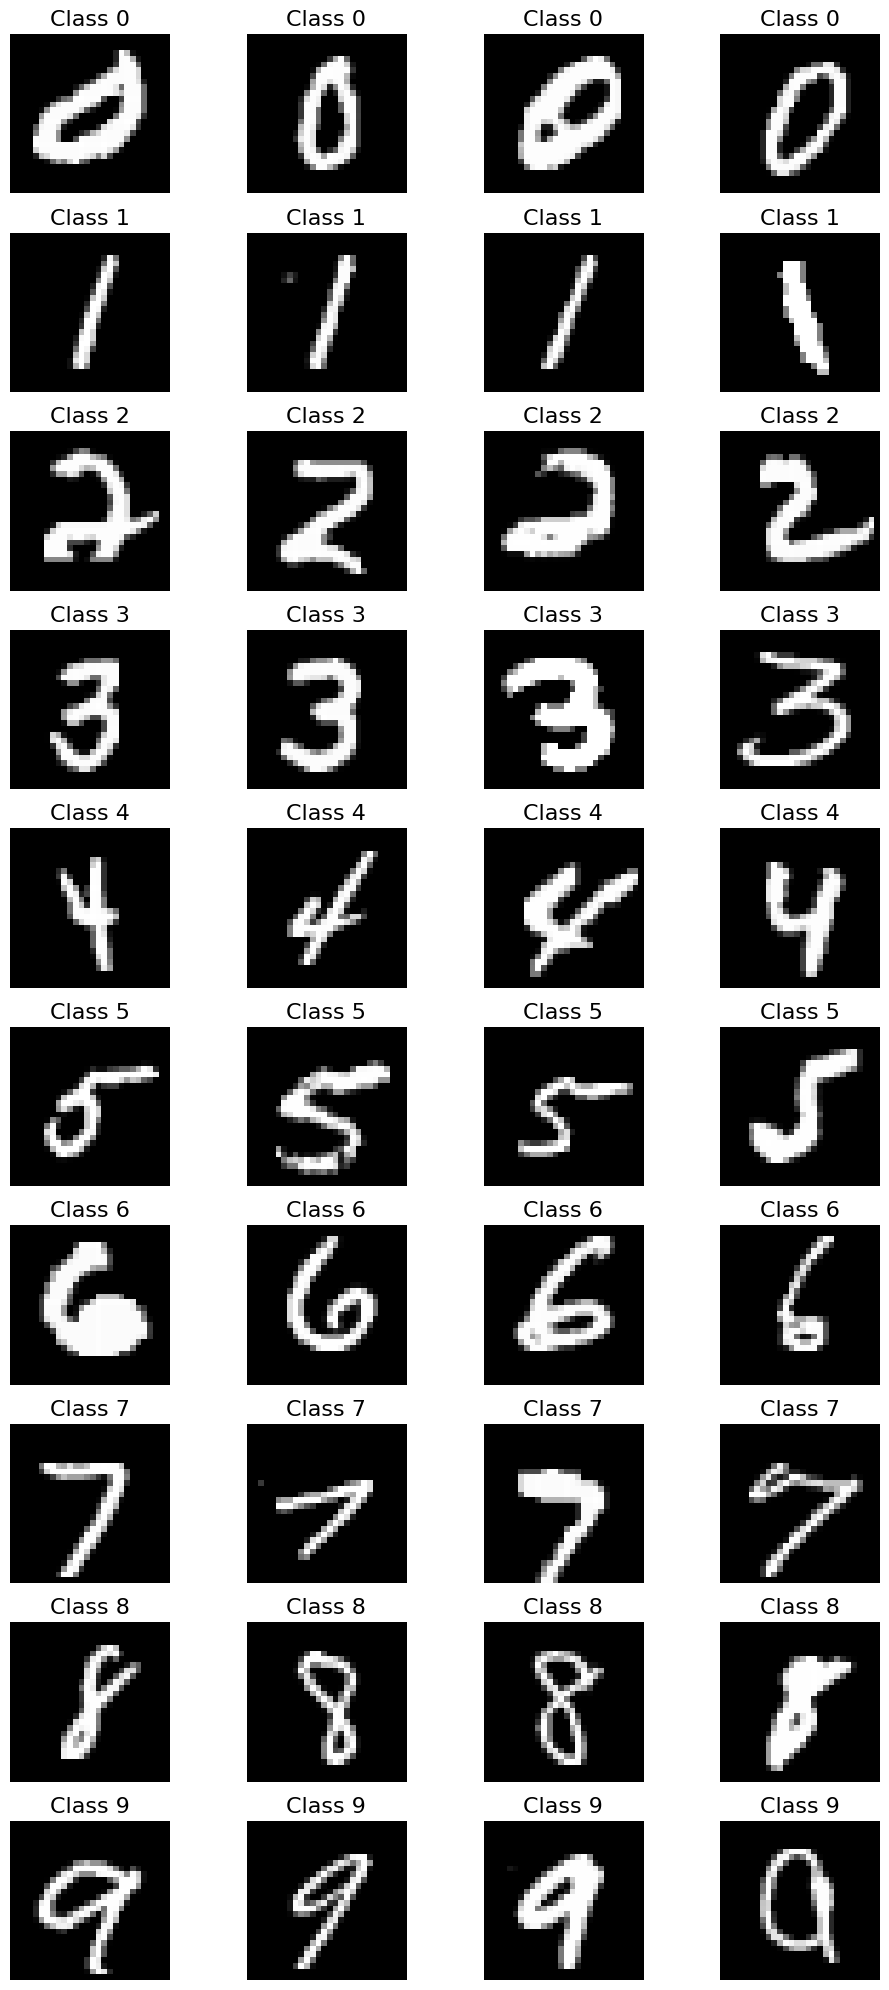

In [5]:
# Use the function to show random images from each class
show_random_images_from_each_class(train_dataset, num_images_per_class=4)

Exercise: Variational Autoencoders (VAE) and Conditional Variational Autoencoders (CVAE)

with MLP Architectures

In this exercise, we'll explore Variational Autoencoders (VAE) and Conditional VAE (CVAE) using PyTorch.

We will implement these models using Multi-Layer Perceptrons (MLP)

Let's get started!

# 1) VAE --> MLP

In [64]:
# Define a simple VAE class with MLP architecture

class VAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE_MLP, self).__init__()
        # TODO: Define the architecture of the encoder and decoder
        self.encoder = nn.Sequential(
            # TODO: Add layers for the encoder
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.decoder = nn.Sequential(
            # TODO: Add layers for the decoder
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        std = torch.exp(logvar / 2.0)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(x.size(0), -1)
        hidden = self.encoder(x)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        z = self.reparameterize(mu, logvar)
        recon = self.decoder(z)
        return recon, mu, logvar

In [6]:
# Define VAE loss function

def vae_loss(recon, data, mu, logvar):
    # TODO: Implement the reconstruction loss
    reconstruction_loss = F.binary_cross_entropy(recon, data, reduction='sum')

    # TODO: Implement the KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # TODO: Return the total loss as the sum of reconstruction and KL divergence losses
    return (reconstruction_loss + kl_divergence)

In [7]:
# Training Loop - VAE (MLP)
def train_vae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        print()
        print(50 * "#")
        total_loss = 0
        for batch_idx, (data, _) in enumerate(train_loader):
            # TODO: Forward process
            optimizer.zero_grad()

            recon, mu, logvar = model(data)

            # TODO: Flatten the data and recon tensors
            data = data.view(data.size(0), -1)
            recon = recon.view(recon.size(0), -1)

            # TODO: Calculate the loss using the vae_loss function
            loss = vae_loss(recon, data, mu, logvar)

            # TODO: Backpropagation and optimization step
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'VAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0:
            print("Sample Images:")
            with torch.no_grad():
                num_samples = 6  # Generate num_samples random samples
                sample = torch.randn(num_samples, 2)
                sample = model.decoder(sample).view(num_samples, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))
                for i in range(num_samples):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].axis('off')
                plt.show()

        # TODO: Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()  # TODO: Save the model

    # TODO: Save the best model to a file
    torch.save(best_model, 'best_vae_mlp_model.pth')
    print("Best model saved as 'best_vae_mlp_model.pth'")



##################################################
VAE-MLP Epoch [1/10], Loss: 173.47507071940103
Sample Images:


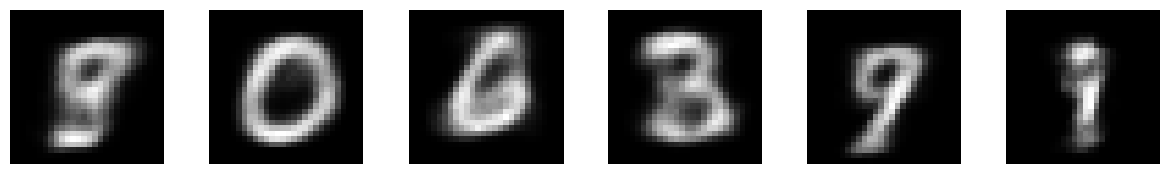


##################################################
VAE-MLP Epoch [2/10], Loss: 154.2061957763672
Sample Images:


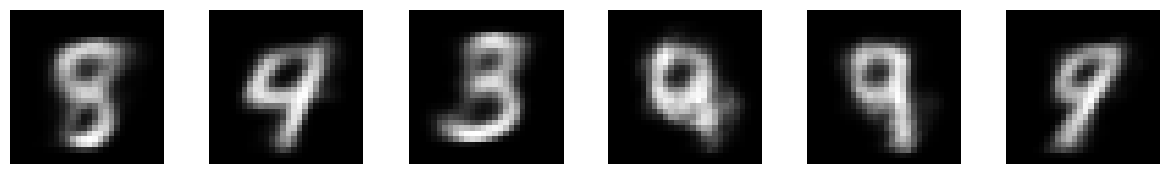


##################################################
VAE-MLP Epoch [3/10], Loss: 149.35152369791666
Sample Images:


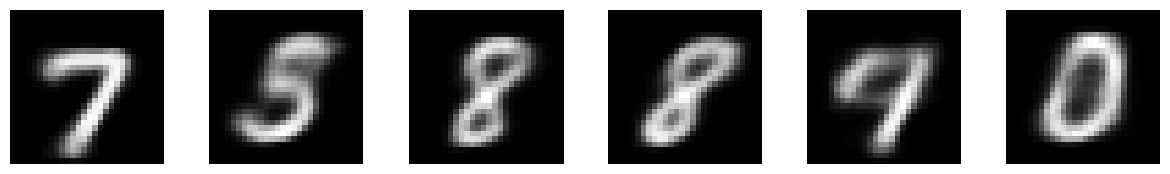


##################################################
VAE-MLP Epoch [4/10], Loss: 146.79937560221353
Sample Images:


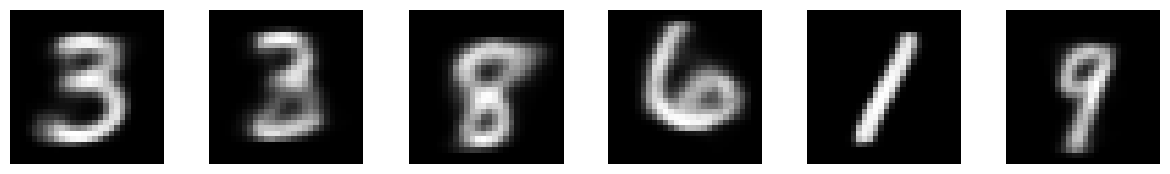


##################################################
VAE-MLP Epoch [5/10], Loss: 145.22356494547526
Sample Images:


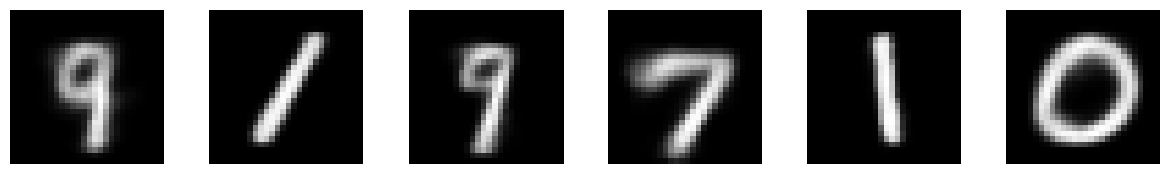


##################################################
VAE-MLP Epoch [6/10], Loss: 143.79247790527344
Sample Images:


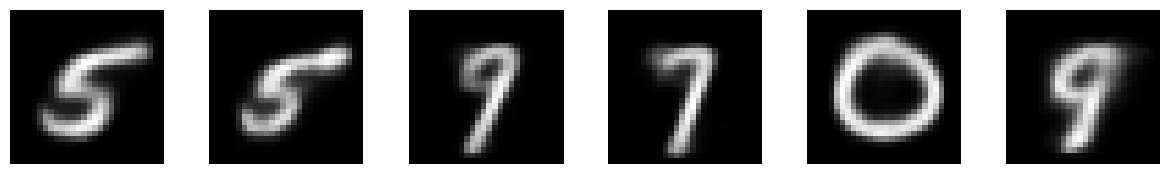


##################################################
VAE-MLP Epoch [7/10], Loss: 143.01650361328126
Sample Images:


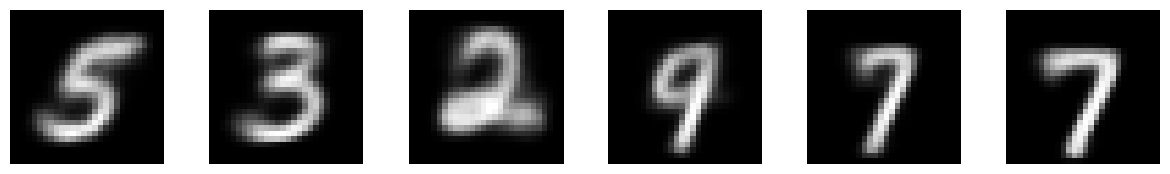


##################################################
VAE-MLP Epoch [8/10], Loss: 142.2967505859375
Sample Images:


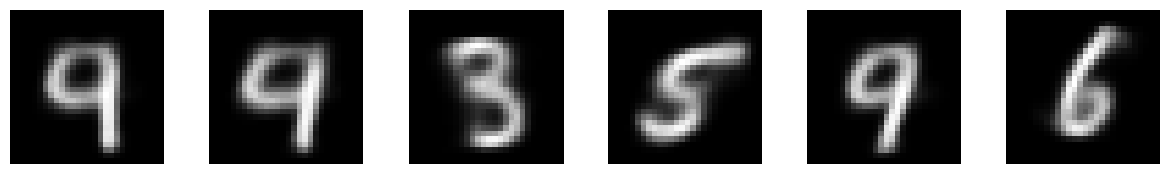


##################################################
VAE-MLP Epoch [9/10], Loss: 141.53847278645833
Sample Images:


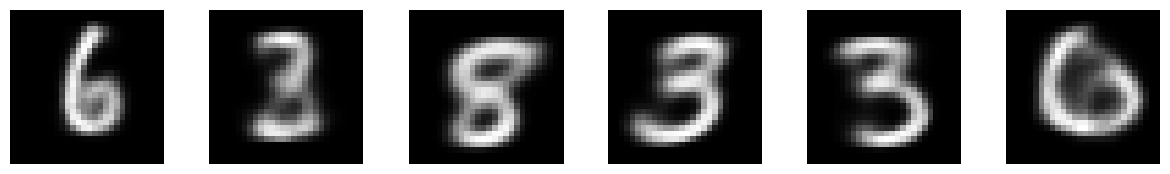


##################################################
VAE-MLP Epoch [10/10], Loss: 141.0345559326172
Sample Images:


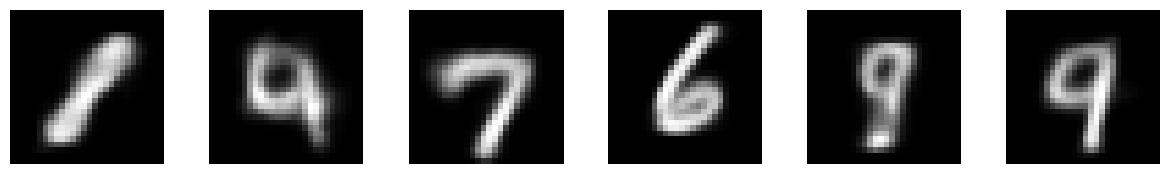

Best model saved as 'best_vae_mlp_model.pth'


In [9]:
# Train VAE-MLP
vae_mlp = VAE_MLP(input_dim=784, hidden_dim=500, latent_dim=2)
train_vae_mlp(vae_mlp, train_loader)

# 2) CVAE --> MLP

In [65]:
# Define a simple CVAE class with MLP architecture

class CVAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_classes):
        super(CVAE_MLP, self).__init__()
        # TODO: Define the architecture of the encoder
        self.encoder = nn.Sequential(
            # TODO: Add layers for the encoder
            nn.Linear(input_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.fc_class = nn.Linear(hidden_dim, num_classes)

        # TODO: Define the architecture of the decoder
        self.decoder = nn.Sequential(
            # TODO: Add layers for the decoder
            nn.Linear(latent_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        std = torch.exp(logvar / 2.0)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def forward(self, x, y):
        x = x.view(x.size(0), -1)
        y = y.view(y.size(0), -1)
        # TODO: Concatenate x and y before passing them to the encoder
        x = torch.cat([x, y], dim=1)
        # TODO: Implement the forward pass
        hidden = self.encoder(x)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        z = self.reparameterize(mu, logvar)
        class_logits = self.fc_class(hidden)
        latent = torch.cat([z, y], dim=1)
        recon = self.decoder(latent)
        return recon, mu, logvar, class_logits


In [54]:
# Define CVAE loss function
def cvae_loss(recon, data, mu, logvar, class_logits, labels):
    # TODO: Flatten the data tensor
    data = data.view(data.size(0), -1)

    # TODO: Implement the reconstruction loss
    reconstruction_loss = F.mse_loss(recon, data)

    # TODO: Implement the KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # TODO: Implement the cross-entropy loss for class prediction
    ce_loss = F.cross_entropy(class_logits, labels)

    # TODO: Return the total loss as the sum of reconstruction, KL divergence, and cross-entropy losses
    return (reconstruction_loss + kl_divergence + ce_loss)


In [55]:
# Training Loop - CVAE (MLP)
def train_cvae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        print()
        print(50 * "#")
        total_loss = 0
        for batch_idx, (data, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            # One-hot encode the labels
            labels_one_hot = F.one_hot(labels, num_classes=10).float()

            # TODO: Forward pass through the model and calculate the loss using cvae_loss
            recon, mu, logvar, class_logits = model(data, labels_one_hot)

            loss = cvae_loss(recon, data, mu, logvar, class_logits, labels)

            # TODO: Backpropagation and optimization step
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f'CVAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0:
            print("Sample Images:")
            with torch.no_grad():
                num_classes = 10  # Number of classes (0 to 9)
                num_samples_per_class = 1  # One sample per class
                # Generate random samples
                z = torch.randn(num_classes * num_samples_per_class, 2)
                # Generate one-hot encoded class labels
                y = torch.eye(num_classes).repeat(num_samples_per_class, 1)
                # Concatenate the random samples and class labels before passing them to the decoder
                sample = torch.cat([z, y], dim=1)
                sample = model.decoder(sample).view(num_classes * num_samples_per_class, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_classes, figsize=(15, 2))
                for i in range(num_classes):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].set_title(f"Class {i}", fontsize=16)
                    axs[i].axis('off')
                plt.show()

        # TODO: Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()

    # TODO: Save the best model to a file
    torch.save(best_model, 'best_cvae_mlp_model.pth')
    print("Best model saved as 'best_cvae_mlp_model.pth'")



##################################################
CVAE-MLP Epoch [1/10], Loss: 0.2839090905186019
Sample Images:


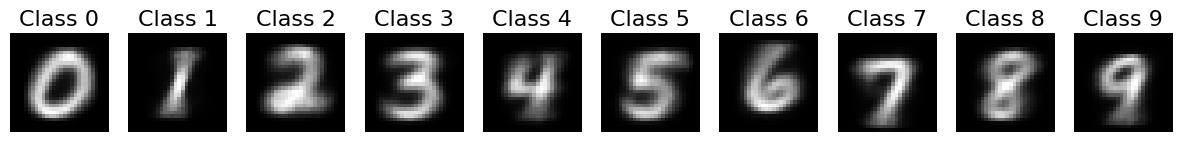


##################################################
CVAE-MLP Epoch [2/10], Loss: 0.05778332993880645
Sample Images:


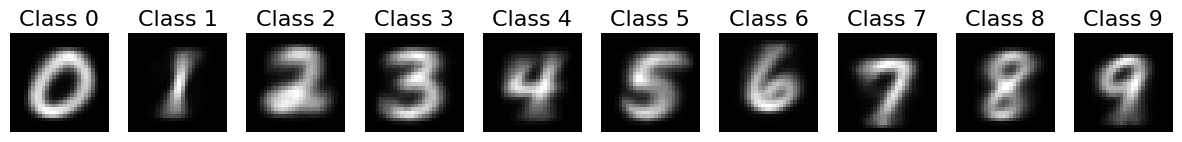


##################################################
CVAE-MLP Epoch [3/10], Loss: 0.055570670719276356
Sample Images:


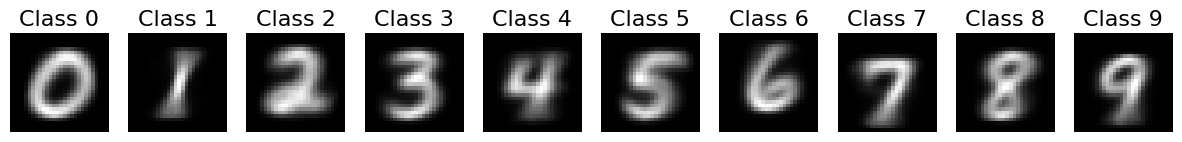


##################################################
CVAE-MLP Epoch [4/10], Loss: 0.054895094530319356
Sample Images:


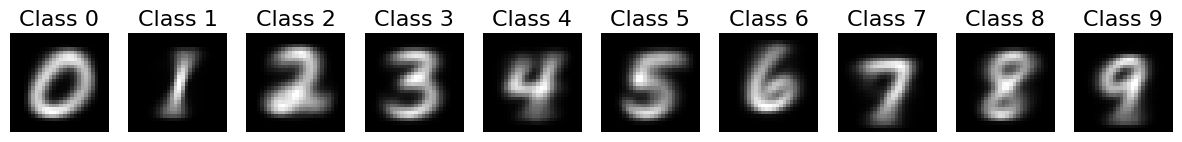


##################################################
CVAE-MLP Epoch [5/10], Loss: 0.05450561345973884
Sample Images:


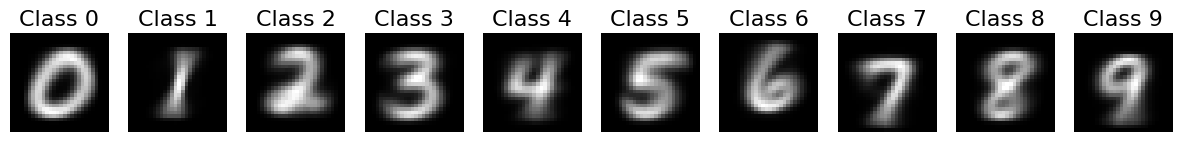


##################################################
CVAE-MLP Epoch [6/10], Loss: 0.0541869020307941
Sample Images:


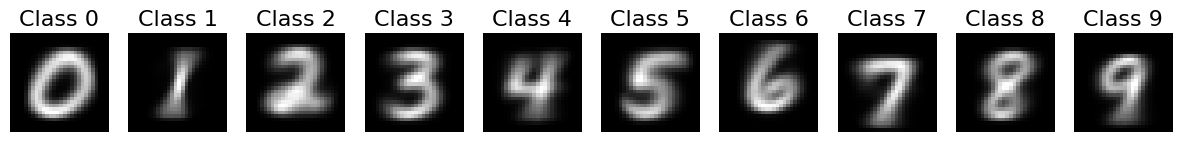


##################################################
CVAE-MLP Epoch [7/10], Loss: 0.054008355924188456
Sample Images:


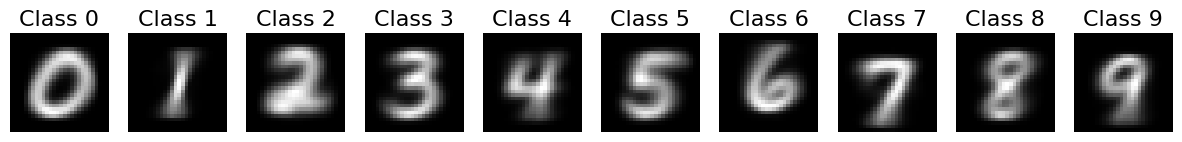


##################################################
CVAE-MLP Epoch [8/10], Loss: 0.053904994635153684
Sample Images:


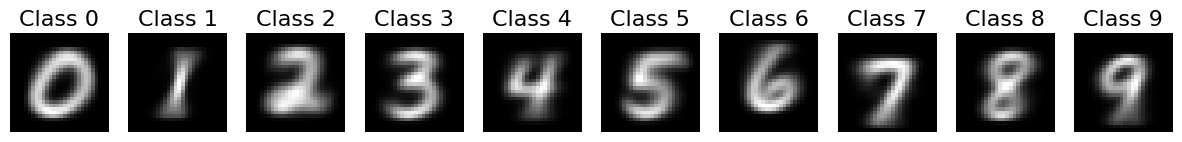


##################################################
CVAE-MLP Epoch [9/10], Loss: 0.053762220302973986
Sample Images:


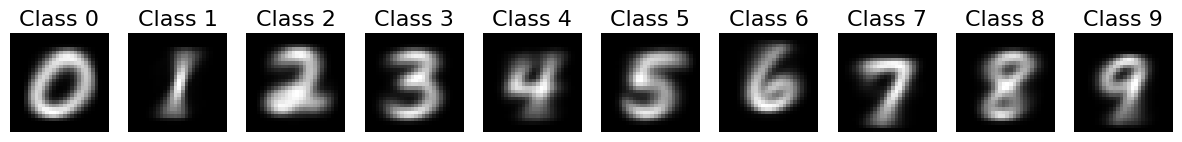


##################################################
CVAE-MLP Epoch [10/10], Loss: 0.05365551344113055
Sample Images:


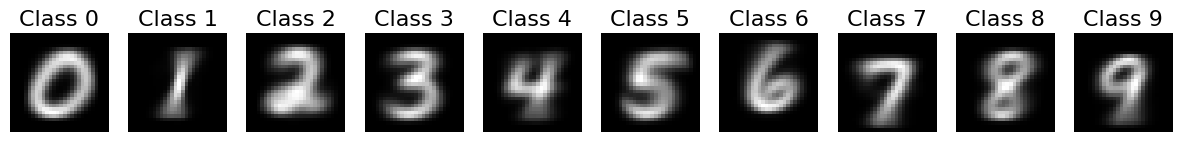

Best model saved as 'best_cvae_mlp_model.pth'


In [56]:
cvae_mlp = CVAE_MLP(input_dim=784, hidden_dim=500, latent_dim=2, num_classes=10)
train_cvae_mlp(cvae_mlp, train_loader)

# 3) Visualizing Latent Space Distribution in Two Models

In this section, we will visualize the latent space distribution for two different models:

## Latent Space Distribution:

### VAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in VAE model.
2. Analyze the characteristics of the distribution.

### CVAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in CVAE model.
2. Analyze the characteristics of the distribution.


Summarize your findings and draw conclusions based on the observed differences in the latent space distribution between VAE (MLP) and CVAE (MLP).


مدل های ذخیره شده در لینک زیر قرار گرفته اند

https://drive.google.com/drive/folders/1scqJsyJGDQLBePpduMwHy6Utd7y8xLn7?usp=drive_link

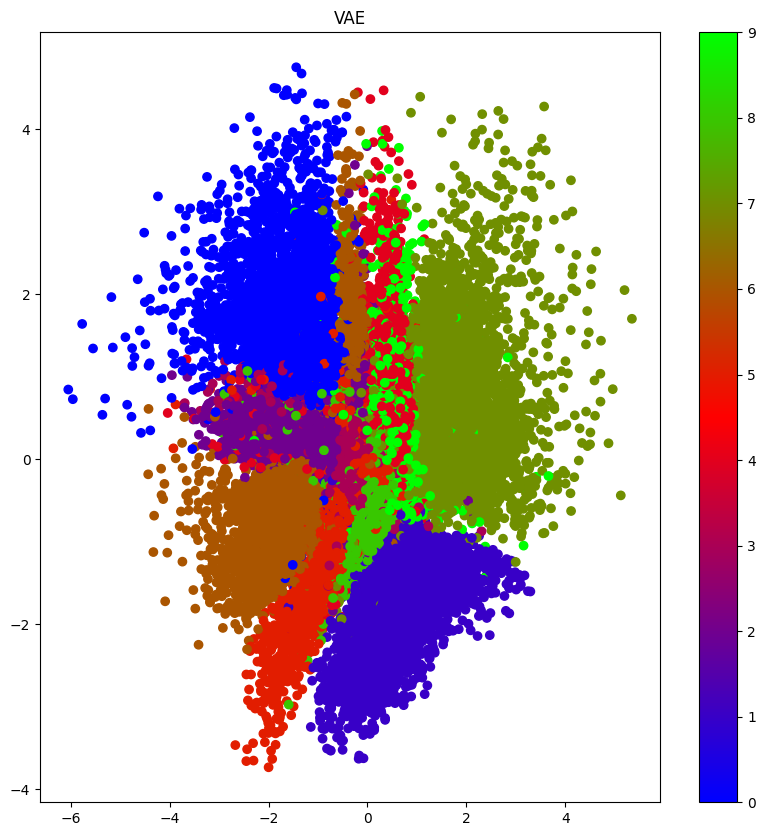

In [66]:
model = VAE_MLP(input_dim=784, hidden_dim=500, latent_dim=2)
model.load_state_dict(torch.load('best_vae_mlp_model.pth'))
x = []
y = np.array([])
for batch_idx, (data, labels) in enumerate(train_loader):
  recon, mu, logvar = model(data)
  z = model.reparameterize(mu, logvar)
  z = z.detach().cpu().numpy()
  labels = labels.detach().cpu().numpy()
  x.append(z)
  y = np.concatenate((y,labels), 0)

x = np.vstack(x)
y = np.array(y)
plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg')
plt.colorbar()
plt.title('VAE')
plt.show()

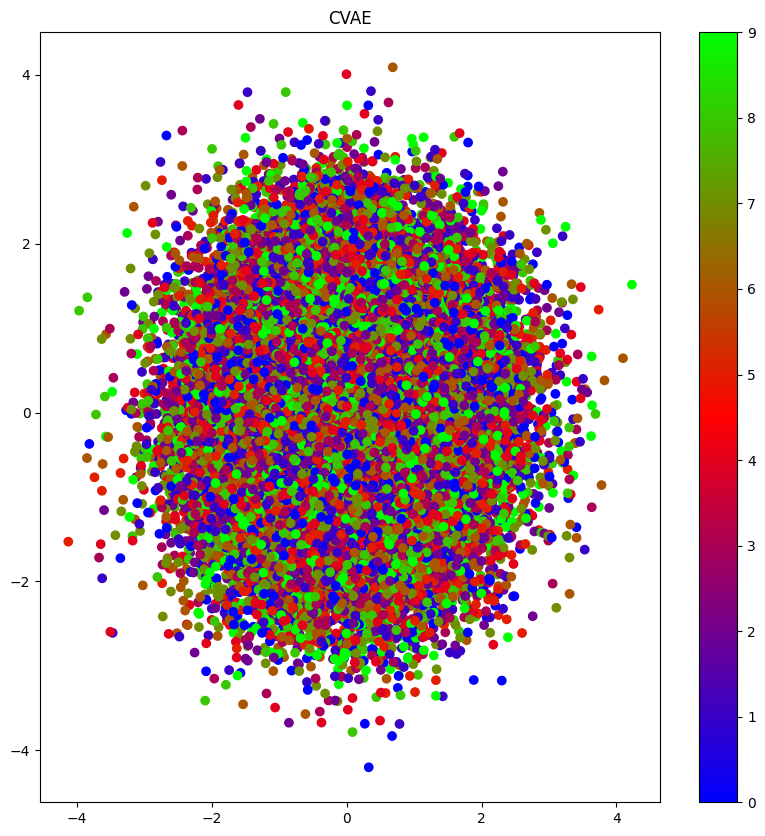

In [67]:
model = CVAE_MLP(input_dim=784, hidden_dim=500, latent_dim=2, num_classes=10)
model.load_state_dict(torch.load('best_cvae_mlp_model.pth'))
x = []
y = np.array([])
for batch_idx, (data, labels) in enumerate(train_loader):
  labels_one_hot = F.one_hot(labels, num_classes=10).float()
  recon, mu, logvar, class_logits = model(data, labels_one_hot)
  z = model.reparameterize(mu, logvar)
  z = z.detach().cpu().numpy()
  labels = labels.detach().cpu().numpy()
  x.append(z)
  y = np.concatenate((y,labels), 0)

x = np.vstack(x)
y = np.array(y)
plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg')
plt.colorbar()
plt.title('CVAE')
plt.show()

در انکودر عادی ما کنترلی روی دیتای تولید شده نداریم و در فضای متغیر های مخفی توزیع دیجیت های مختلف از همدیگر متمایز می شود ولی در انکودر شرطی ما با اضافه کردن اطلاعات لیبل ها کنترل بیشتری روی دیتای تولید شده داریم ولی توزع متغیر های مخفی دیجیت های مختلف قابل تفکیک از هم نیست و یک حالت تصادفی در فضای متغیر های مخفی وجود دارد
